# **Hybrid CNN-FNN Classifier on FMNIST Dataset**

## Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

## Loading Dataset

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to add a color channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

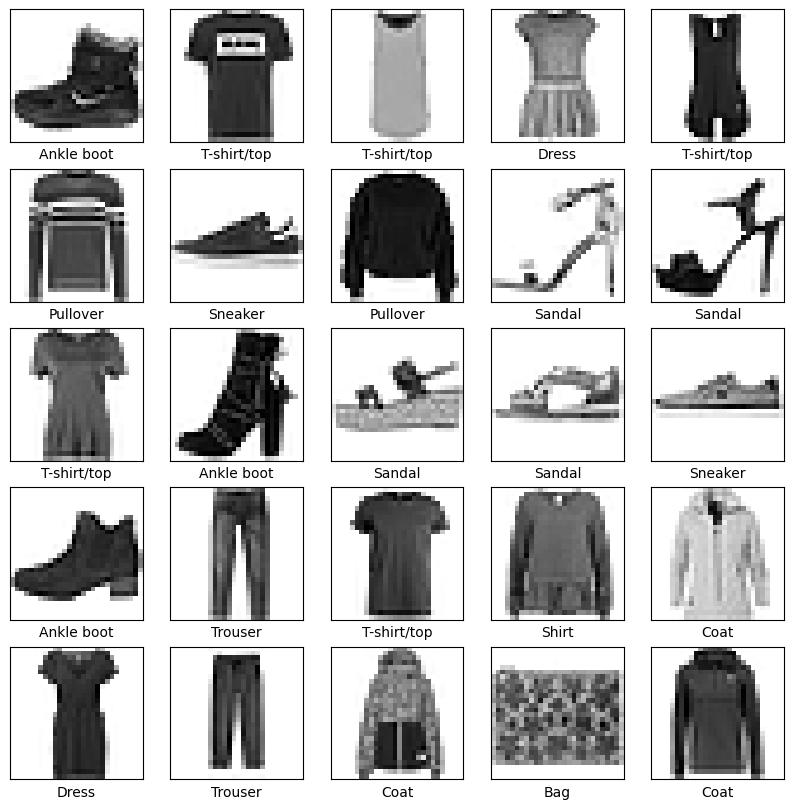

In [4]:
# Visualize a few samples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Defining the Hybrid CNN-FNN Model

In [18]:
# Build the hybrid CNN-FNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, 
            validation_data=(test_images, test_labels))



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7330 - loss: 0.7360 - val_accuracy: 0.8687 - val_loss: 0.3731
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8753 - loss: 0.3449 - val_accuracy: 0.8746 - val_loss: 0.3428
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8924 - loss: 0.2948 - val_accuracy: 0.8976 - val_loss: 0.2865
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9040 - loss: 0.2588 - val_accuracy: 0.8968 - val_loss: 0.2818
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9141 - loss: 0.2318 - val_accuracy: 0.9018 - val_loss: 0.2767
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9253 - loss: 0.2021 - val_accuracy: 0.9068 - val_loss: 0.2501
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9295 - loss: 0.1870 - val_accuracy: 0.8979 - val_loss: 0.2750
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9343 - loss: 0.1733 - val_

## Saving the model

In [8]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("hybrid_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename
model.save_weights("hybrid_model_weights.weights.h5")

print("Model weights saved to disk.")


# # To Load Model ::
# # Load the JSON file that contains the model architecture
# with open('fnn_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()

# # Reconstruct the model from the JSON file
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights("fnn_model_weights.h5")

# print("Model loaded from disk.")



Model weights saved to disk.


## Evaluating the Model Predictions

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9149 - loss: 0.2600
Test accuracy: 91.49%


#### Plot: Accuracy vs Epoch

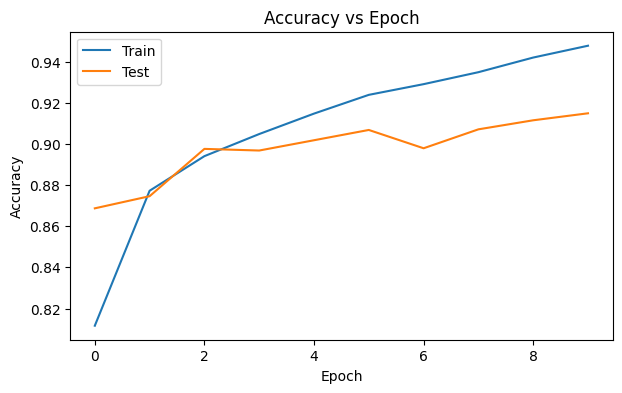

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_vs_epoch_Hybrid.png')

#### Plot: Loss vs Epoch

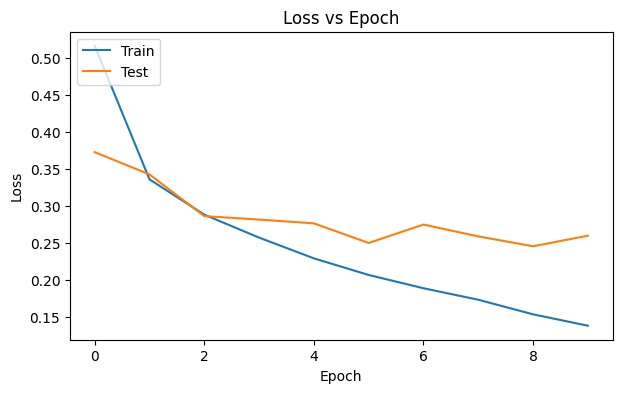

In [11]:
# Plot training & validation loss values
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_vs_epoch_Hybrid.png')


plt.show()


### Visualising the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


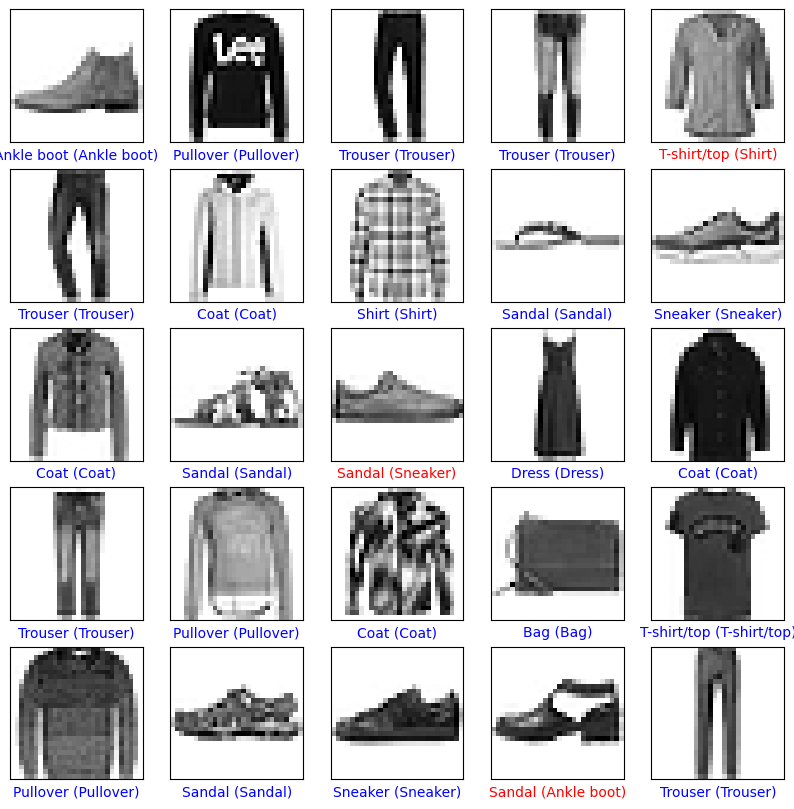

In [12]:
# Make predictions
predictions = model.predict(test_images)

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
    plt.savefig('Predictions_Hybrid.png')
plt.show()


### Tabulating Classification Report

In [13]:
# One-hot encode the labels
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)



In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()*100

# Calculate accuracy for each class
report_df['accuracy'] = report_df.apply(lambda row: row['support'] * row['recall'] / row['support'] 
    if row.name in class_names else np.nan, axis=1)

# Remove accuracy, macro avg, and weighted avg rows
report_df = report_df.loc[class_names]

# Select and reorder columns
report_df = report_df[['accuracy', 'precision', 'recall', 'f1-score']]


# Round the DataFrame to 2 decimal places
report_df = report_df.round(2)

Accuracy: 91.49


#### Display the Table

In [15]:
# Display the classification report in a box format
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Optionally, save the table to a CSV file
report_df.to_csv('classification_report_Hybrid.csv', index=True)


+-------------+------------+-------------+----------+------------+
|             |   accuracy |   precision |   recall |   f1-score |
+=============+============+=============+==========+============+
| T-shirt/top |       90.5 |       83.18 |     90.5 |      86.69 |
+-------------+------------+-------------+----------+------------+
| Trouser     |       98.3 |       99.19 |     98.3 |      98.74 |
+-------------+------------+-------------+----------+------------+
| Pullover    |       82.6 |       90.97 |     82.6 |      86.58 |
+-------------+------------+-------------+----------+------------+
| Dress       |       92.9 |       90.99 |     92.9 |      91.93 |
+-------------+------------+-------------+----------+------------+
| Coat        |       88.1 |       85.45 |     88.1 |      86.76 |
+-------------+------------+-------------+----------+------------+
| Sandal      |       98.5 |       97.24 |     98.5 |      97.86 |
+-------------+------------+-------------+----------+---------

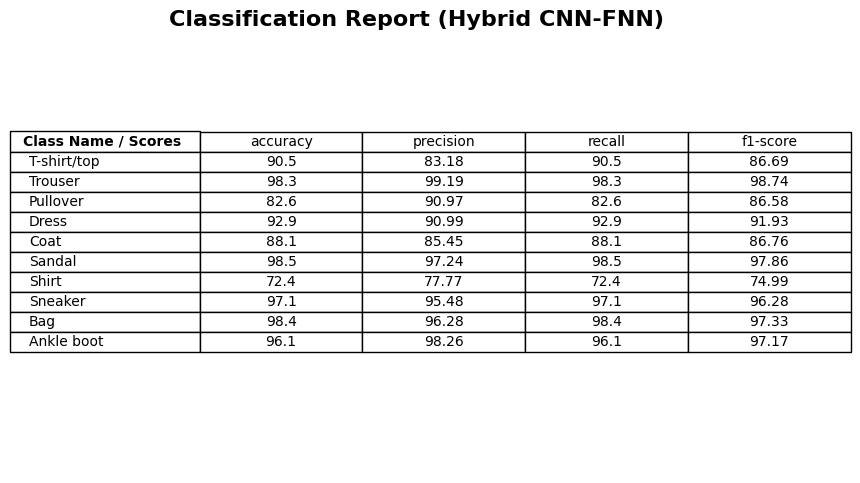

In [16]:

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add corner label
table.add_cell(0, -1, width=0.15, height=0.045)
table[0, -1].set_text_props(text='Class Name / Scores', weight='bold')

# Add a title to the plot
plt.title('Classification Report (Hybrid CNN-FNN)', x=0.3, y=0.95, fontsize=16, fontweight='bold', ha='center')

# Save the table as an image
plt.savefig('classification_report_Hybrid.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()